In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import string
import spacy
# import spacy_fastlang
# import spacy_langdetect
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('F:\\tifin-internship\\sofmattress_train.csv')

In [11]:
df.head(4)


,sentence,label
0,You guys provide EMI option?,EMI
1,Do you offer Zero Percent EMI payment options?,EMI
2,0% EMI.,EMI
3,EMI,EMI


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  328 non-null    object
 1   label     328 non-null    object
dtypes: object(2)
memory usage: 5.3+ KB


In [15]:
df.size

656

In [17]:
df.columns

Index(['sentence', 'label'], dtype='object')

In [18]:
df.rank

<bound method NDFrame.rank of                                            sentence   label
0                      You guys provide EMI option?     EMI
1    Do you offer Zero Percent EMI payment options?     EMI
2                                           0% EMI.     EMI
3                                               EMI     EMI
4                             I want in installment     EMI
..                                              ...     ...
323              May I please know about the offers  OFFERS
324                                Available offers  OFFERS
325                              Is offer available  OFFERS
326                      Want to know the discount   OFFERS
327                 Tell me about the latest offers  OFFERS

[328 rows x 2 columns]>

In [21]:
df.isna().sum()


sentence    0
label       0
dtype: int64

In [22]:
df.describe()
df.head(4)
df.tail(4)
df.sample(4)
df.sample(4)

,sentence,label
132,Inches,WHAT_SIZE_TO_ORDER
122,Can I please have the size chart?,WHAT_SIZE_TO_ORDER
167,Where can I see the product before I buy,DISTRIBUTORS
12,0% Emi,EMI


In [23]:
df.isnull().sum()

sentence    0
label       0
dtype: int64

In [24]:
df.duplicated().sum()


4

In [26]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.shape
df.columns
df.columns = ['intent', 'text']
df.columns

Index(['intent', 'text'], dtype='object')

In [29]:
new_df = df.head(4)

In [30]:
new_df.head(4)


,intent,text
0,You guys provide EMI option?,EMI
1,Do you offer Zero Percent EMI payment options?,EMI
2,0% EMI.,EMI
3,EMI,EMI


In [33]:
new_df.isnull().sum()

intent    0
text      0
dtype: int64

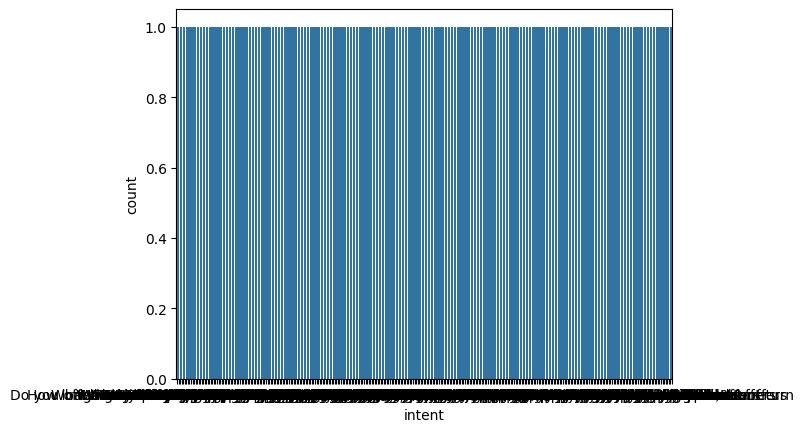

In [34]:
sns.countplot(x='intent', data=df)
plt.show()



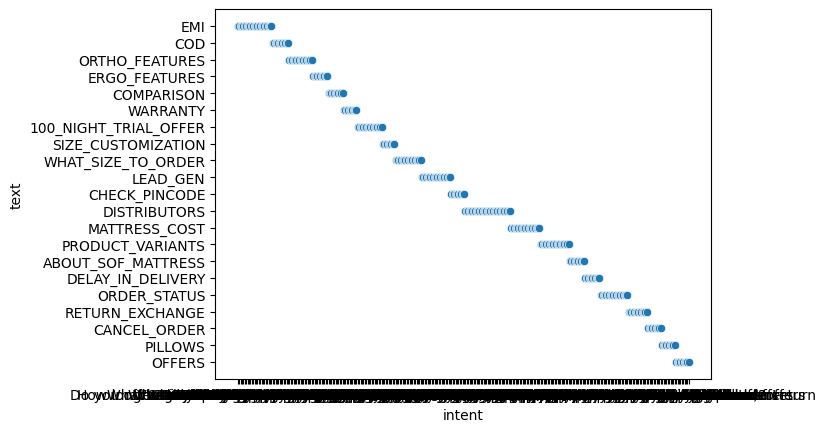

In [38]:
sns.scatterplot(x='intent', y='text', data=df)
# sns.axisgrid(x='intent', y='text', data=df)
plt.show()


<Axes: xlabel='intent', ylabel='Count'>

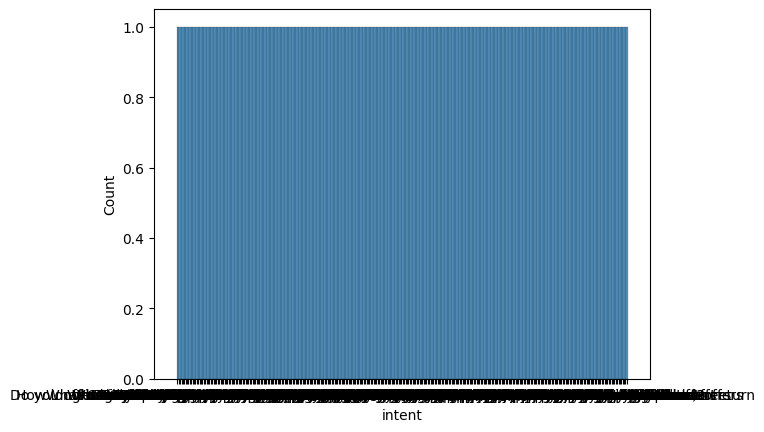

In [42]:
sns.histplot(x='intent', data=df)
